In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from pathlib import Path
import os

# Configuración de matplotlib para mejores gráficas
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Cargar datos de un archivo

In [5]:
def cargar_espectro(archivo):
    """
    Carga un archivo CSV de espectro (solo Traza A)
    Retorna un DataFrame con Longitud de Onda y Nivel
    """
    # Leer el CSV desde la línea 245 donde están los datos
    df = pd.read_csv(archivo, skiprows=244)  # skiprows=244 para empezar en la línea 245
    
    # Limpiar nombres de columnas (eliminar espacios)
    df.columns = df.columns.str.strip()
    
    # Extraer solo las columnas de la Traza A
    espectro = pd.DataFrame({
        'Longitud_Onda_nm': pd.to_numeric(df.iloc[:, 0], errors='coerce'),
        'Nivel': pd.to_numeric(df.iloc[:, 1], errors='coerce')
    })
    
    # Eliminar filas con NaN
    espectro = espectro.dropna()
    
    return espectro

# Probar con el primer archivo
espectro_1 = cargar_espectro('Espectro/WaveData20070101_001.csv')
print(f"Número de puntos: {len(espectro_1)}")
print(f"\nPrimeras filas:")
espectro_1.head(10)

Número de puntos: 501

Primeras filas:


,Longitud_Onda_nm,Nivel
0,1520.05,-1.545000e-08
1,1520.21,-7.841000e-10
2,1520.37,1.546000e-08
3,1520.53,-1.775000e-08
4,1520.69,6.535000e-09
5,1520.85,-2.428000e-08
6,1521.01,-6.361000e-09
7,1521.17,2.145000e-09
8,1521.33,-3.377000e-09
9,1521.49,-2.026000e-09


## 2. Visualizar un espectro individual

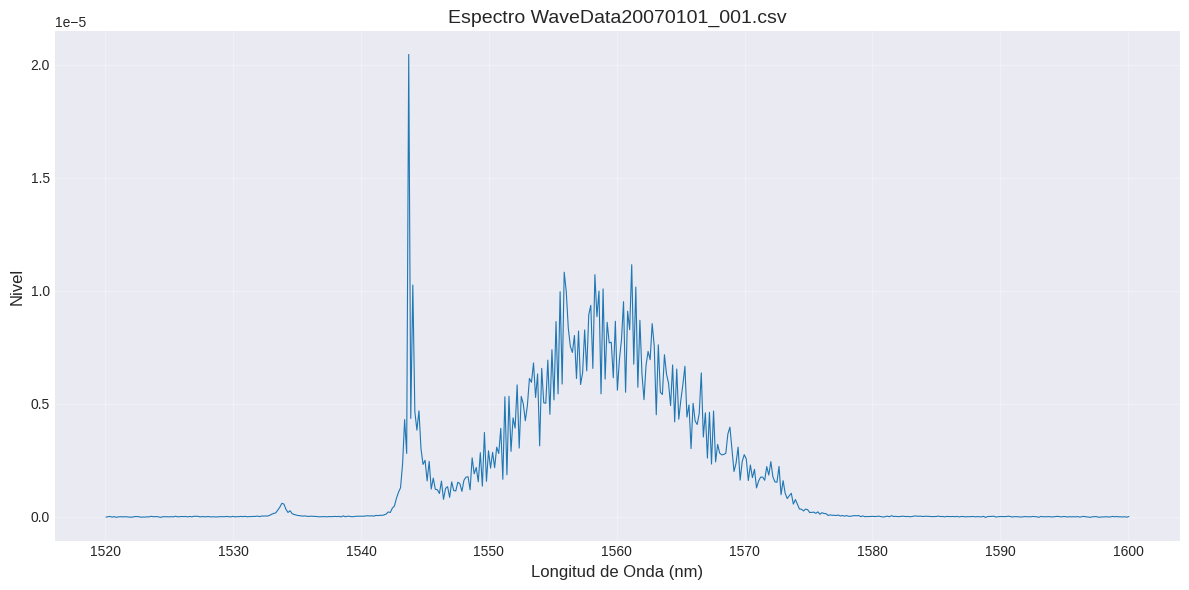

In [6]:
def graficar_espectro(df, titulo='Espectro'):
    """
    Grafica un espectro
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['Longitud_Onda_nm'], df['Nivel'], linewidth=0.8)
    plt.xlabel('Longitud de Onda (nm)', fontsize=12)
    plt.ylabel('Nivel', fontsize=12)
    plt.title(titulo, fontsize=14)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Graficar el primer espectro
graficar_espectro(espectro_1, 'Espectro WaveData20070101_001.csv')

## 3. Visualizar múltiples espectros

In [7]:
# Obtener lista de todos los archivos CSV en la carpeta Espectro
carpeta_espectro = Path('Espectro')
archivos_espectros = sorted(carpeta_espectro.glob('*.csv'))
print(f"Total de archivos encontrados: {len(archivos_espectros)}")
print(f"Primeros 10 archivos: {[f.name for f in archivos_espectros[:10]]}")

Total de archivos encontrados: 60
Primeros 10 archivos: ['WaveData20070101_001.csv', 'WaveData20070101_002.csv', 'WaveData20070101_003.csv', 'WaveData20070101_004.csv', 'WaveData20070101_005.csv', 'WaveData20070101_006.csv', 'WaveData20070101_007.csv', 'WaveData20070101_008.csv', 'WaveData20070101_009.csv', 'WaveData20070101_010.csv']


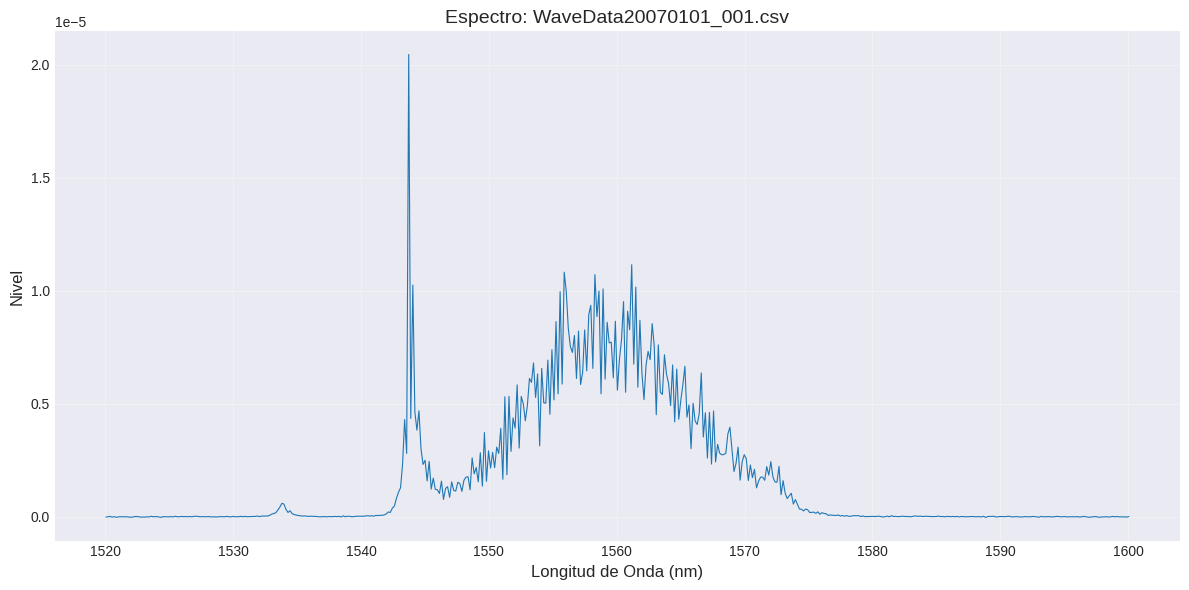

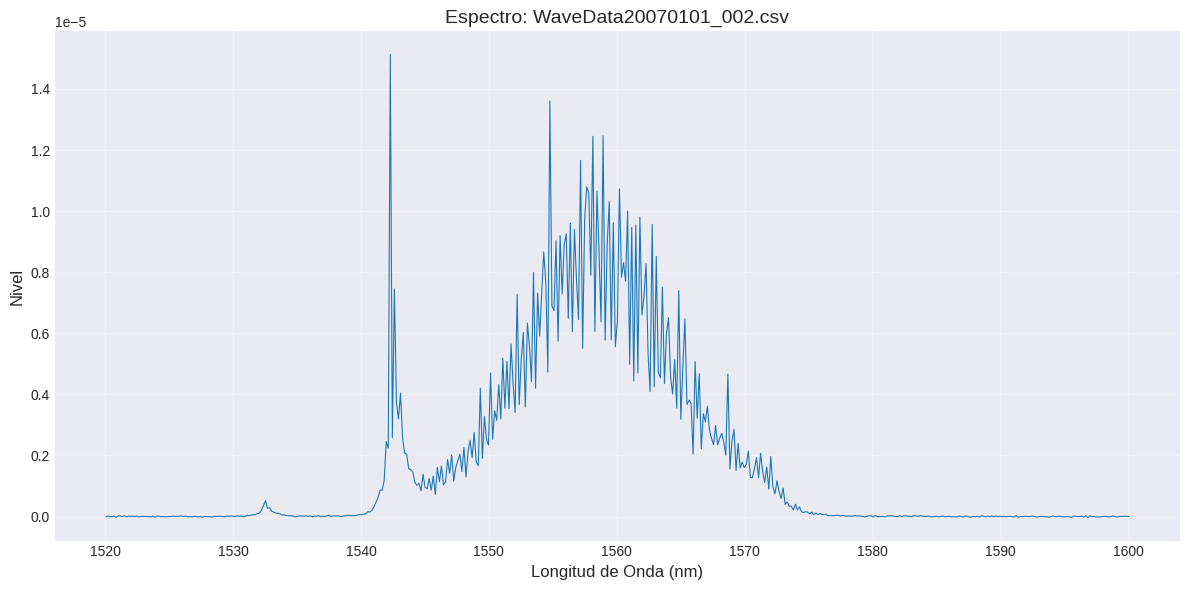

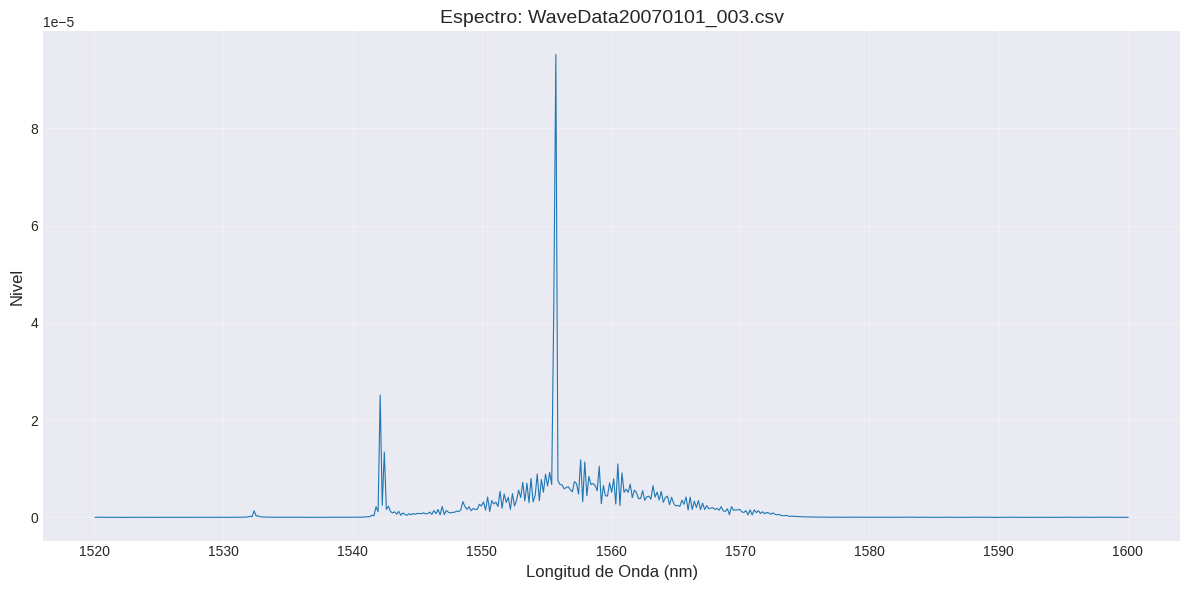

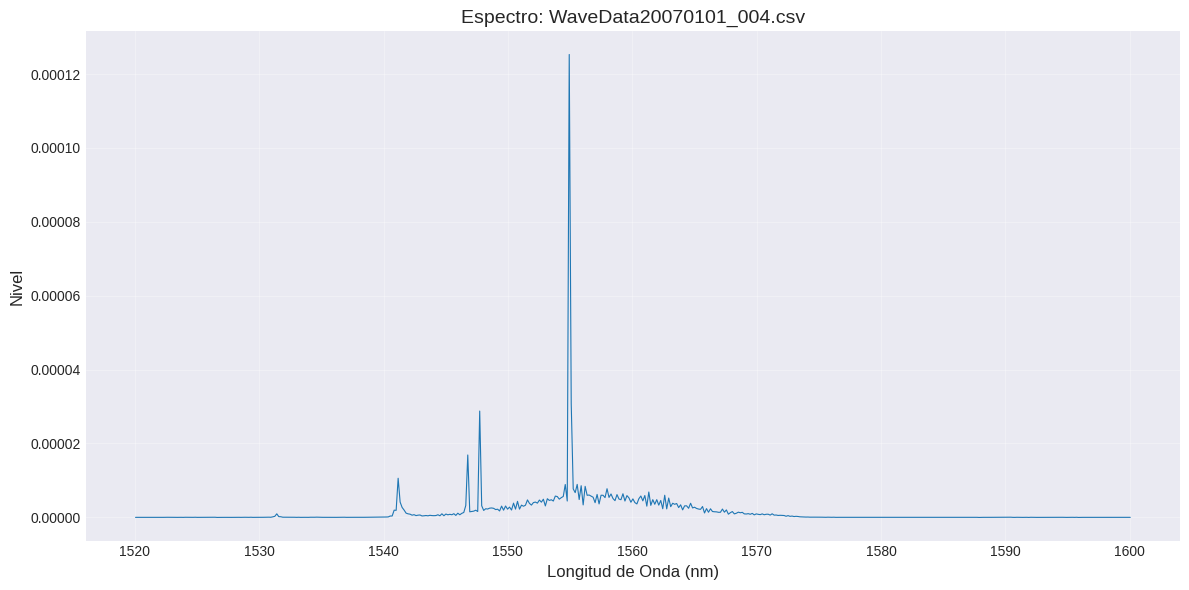

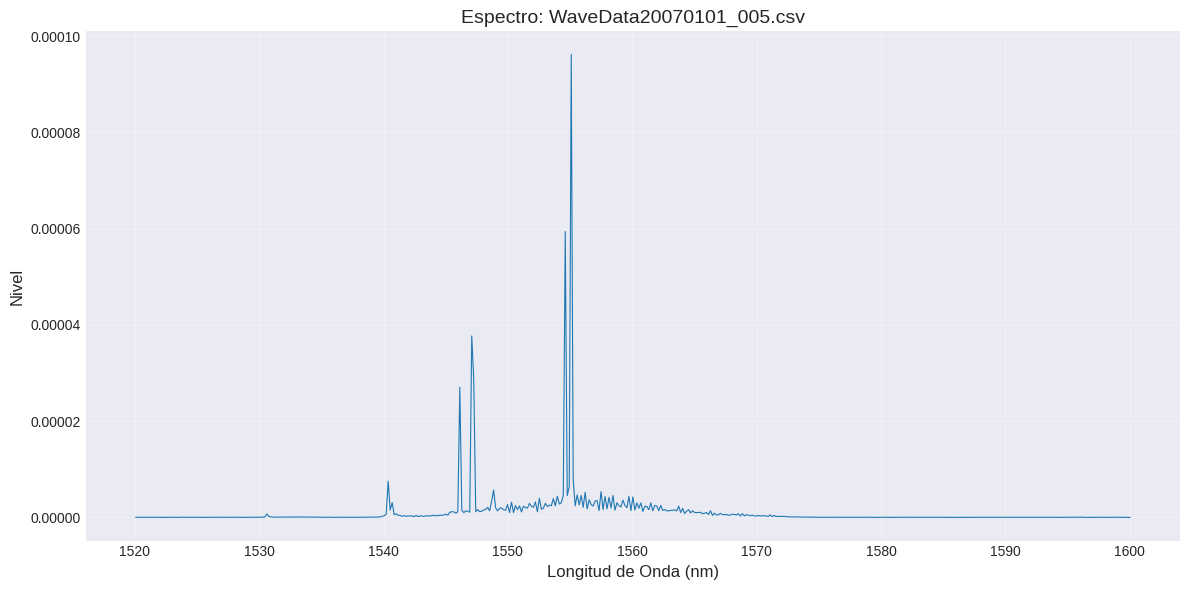

In [8]:
def graficar_multiples_espectros(archivos, num_espectros=5, inicio=0):
    """
    Grafica múltiples espectros uno a uno
    
    Args:
        archivos: lista de archivos a graficar
        num_espectros: número de espectros a graficar
        inicio: índice de inicio para seleccionar archivos
    """
    archivos_seleccionados = archivos[inicio:inicio + num_espectros]
    
    for archivo in archivos_seleccionados:
        df = cargar_espectro(archivo)
        graficar_espectro(df, f'Espectro: {archivo.name}')

# Graficar los primeros 5 espectros
graficar_multiples_espectros(archivos_espectros, num_espectros=5, inicio=0)

## 4. Guardar espectros

In [ ]:
def guardar_todos_los_espectros(archivos, carpeta_destino='Graficas_Espectros'):
    """
    Guarda gráficas de todos los espectros en una carpeta
    
    Args:
        archivos: lista de archivos a graficar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Generando {len(archivos)} gráficas de espectros...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar espectro
        df = cargar_espectro(archivo)
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Longitud_Onda_nm'], df['Nivel'], linewidth=0.8)
        plt.xlabel('Longitud de Onda (nm)', fontsize=12)
        plt.ylabel('Nivel', fontsize=12)
        plt.title(f'Espectro: {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesados {i}/{len(archivos)} espectros...")
    
    print(f"\n¡Completado! Todas las gráficas guardadas en '{carpeta_destino}/'")

# Guardar todos los espectros
guardar_todos_los_espectros(archivos_espectros)

Generando 60 gráficas de espectros...
  Procesados 10/60 espectros...
  Procesados 20/60 espectros...
  Procesados 30/60 espectros...
  Procesados 40/60 espectros...
  Procesados 50/60 espectros...
  Procesados 60/60 espectros...

¡Completado! Todas las gráficas guardadas en 'Graficas_Espectros/'


## 5. Estadísticas de los espectros

In [12]:
def analizar_espectro(archivo):
    """
    Calcula estadísticas básicas de un espectro
    """
    df = cargar_espectro(archivo)
    
    stats = {
        'Archivo': archivo.name,
        'Puntos': len(df),
        'λ Inicio (nm)': df['Longitud_Onda_nm'].min(),
        'λ Fin (nm)': df['Longitud_Onda_nm'].max(),
        'Nivel Medio': df['Nivel'].mean(),
        'Nivel Mín': df['Nivel'].min(),
        'Nivel Máx': df['Nivel'].max()
    }
    return stats

# Analizar los primeros 10 espectros
estadisticas = [analizar_espectro(archivo) for archivo in archivos_espectros[:60]]
df_stats = pd.DataFrame(estadisticas)
df_stats

,Archivo,Puntos,λ Inicio (nm),λ Fin (nm),Nivel Medio,Nivel Mín,Nivel Máx
0,WaveData20070101_001.csv,501,1520.05,1600.05,1.765436e-06,-3.042000e-08,0.000020
1,WaveData20070101_002.csv,501,1520.05,1600.05,1.765385e-06,-3.050000e-08,0.000015
2,WaveData20070101_003.csv,501,1520.05,1600.05,1.614980e-06,-2.842000e-08,0.000095
3,WaveData20070101_004.csv,501,1520.05,1600.05,1.550532e-06,-2.741000e-08,0.000125
4,WaveData20070101_005.csv,501,1520.05,1600.05,1.145782e-06,-3.175000e-08,0.000096
5,WaveData20070101_006.csv,501,1520.05,1600.05,1.034902e-06,-3.047000e-08,0.000081
6,WaveData20070101_007.csv,501,1520.05,1600.05,9.841350e-07,-2.943000e-08,0.000077
7,WaveData20070101_008.csv,501,1520.05,1600.05,7.601767e-07,-3.743000e-08,0.000052
8,WaveData20070101_009.csv,501,1520.05,1600.05,1.341829e-06,-2.882000e-08,0.000026
9,WaveData20070101_010.csv,501,1520.05,1600.05,1.187559e-06,-3.817000e-08,0.000023


## 6. Visualización interactiva

In [14]:
from ipywidgets import interact, SelectMultiple, Button, Output, VBox, HBox
from IPython.display import display, clear_output

# Crear lista de nombres de archivos para el menú
nombres_archivos = [f.name for f in archivos_espectros]

# Widget de selección múltiple
selector = SelectMultiple(
    options=nombres_archivos,
    description='Espectros:',
    rows=20,
    layout={'width': '400px'}
)

# Botón para graficar
boton_graficar = Button(
    description='📊 Graficar Seleccionados',
    button_style='success',
    layout={'width': '200px'}
)

# Botón para limpiar selección
boton_limpiar = Button(
    description='🗑️ Limpiar',
    button_style='warning',
    layout={'width': '200px'}
)

# Área de salida para las gráficas
output = Output()

def graficar_seleccionados(b):
    """Función que grafica todos los espectros seleccionados en una misma gráfica"""
    with output:
        clear_output(wait=True)
        seleccionados = selector.value
        
        if len(seleccionados) == 0:
            print("⚠️ No hay archivos seleccionados")
            return
        
        print(f"📊 Graficando {len(seleccionados)} espectro(s) en una misma gráfica...\n")
        
        # Crear una figura única
        plt.figure(figsize=(14, 7))
        
        # Colores para los espectros
        colores = plt.cm.tab20(np.linspace(0, 1, len(seleccionados)))
        
        for i, nombre in enumerate(seleccionados):
            archivo_path = carpeta_espectro / nombre
            df = cargar_espectro(archivo_path)
            plt.plot(df['Longitud_Onda_nm'], df['Nivel'], 
                    label=nombre, linewidth=0.8, alpha=0.7, color=colores[i])
        
        plt.xlabel('Longitud de Onda (nm)', fontsize=12)
        plt.ylabel('Nivel', fontsize=12)
        plt.title(f'Comparación de {len(seleccionados)} Espectros', fontsize=14)
        plt.legend(loc='best', fontsize=8, ncol=2)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

def limpiar_seleccion(b):
    """Limpia la selección actual"""
    selector.value = ()
    with output:
        clear_output()
        print("✅ Selección limpiada")

# Conectar botones con funciones
boton_graficar.on_click(graficar_seleccionados)
boton_limpiar.on_click(limpiar_seleccion)

# Crear layout con menú lateral y gráfica
menu_lateral = VBox([
    selector, 
    boton_graficar, 
    boton_limpiar
], layout={'width': '420px', 'padding': '10px'})

layout_completo = HBox([menu_lateral, output])

# Mostrar interfaz
print("🔬 Selector Interactivo de Espectros - Vista Comparativa")
print("=" * 70)
print("📌 Instrucciones:")
print("  • Mantén Ctrl (o Cmd en Mac) para seleccionar múltiples archivos")
print("  • Todos los espectros se mostrarán en una misma gráfica con colores distintos")
print("  • Haz clic en '📊 Graficar Seleccionados' para visualizar")
print("  • Usa '🗑️ Limpiar' para reiniciar la selección")
print("=" * 70)

display(layout_completo)

🔬 Selector Interactivo de Espectros - Vista Comparativa
📌 Instrucciones:
  • Mantén Ctrl (o Cmd en Mac) para seleccionar múltiples archivos
  • Todos los espectros se mostrarán en una misma gráfica con colores distintos
  • Haz clic en '📊 Graficar Seleccionados' para visualizar
  • Usa '🗑️ Limpiar' para reiniciar la selección


## 7. Datos normalizados

In [ ]:
def guardar_espectros_normalizados(archivos, carpeta_destino='Graficas_Espectros_Normalizados'):
    """
    Guarda gráficas de todos los espectros normalizados en una carpeta
    
    Args:
        archivos: lista de archivos a graficar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas normalizadas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Generando {len(archivos)} gráficas de espectros normalizados...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar espectro
        df = cargar_espectro(archivo)
        
        # Normalizar el espectro (valores entre 0 y 1)
        nivel_min = df['Nivel'].min()
        nivel_max = df['Nivel'].max()
        df['Nivel_Normalizado'] = (df['Nivel'] - nivel_min) / (nivel_max - nivel_min)
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Longitud_Onda_nm'], df['Nivel_Normalizado'], linewidth=0.8)
        plt.xlabel('Longitud de Onda (nm)', fontsize=12)
        plt.ylabel('Nivel Normalizado', fontsize=12)
        plt.title(f'Espectro Normalizado: {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.ylim(-0.05, 1.05)  # Añadir un pequeño margen
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}_normalizado.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesados {i}/{len(archivos)} espectros normalizados...")
    
    print(f"\n¡Completado! Todas las gráficas normalizadas guardadas en '{carpeta_destino}/'")

# Guardar todos los espectros normalizados
guardar_espectros_normalizados(archivos_espectros)

Generando 60 gráficas de espectros normalizados...
  Procesados 10/60 espectros normalizados...
  Procesados 20/60 espectros normalizados...
  Procesados 30/60 espectros normalizados...
  Procesados 40/60 espectros normalizados...
  Procesados 50/60 espectros normalizados...
  Procesados 60/60 espectros normalizados...

¡Completado! Todas las gráficas normalizadas guardadas en 'Graficas_Espectros_Normalizados/'


In [18]:
def guardar_espectros_normalizados(archivos, carpeta_destino='Graficas_Espectros_Normalizados_Global'):
    """
    Guarda gráficas de todos los espectros normalizados con una escala global
    
    Args:
        archivos: lista de archivos a graficar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas normalizadas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Calculando valores globales de {len(archivos)} espectros...")
    
    # Primer paso: encontrar el mínimo y máximo global de todos los espectros
    nivel_min_global = float('inf')
    nivel_max_global = float('-inf')
    
    for archivo in archivos:
        df = cargar_espectro(archivo)
        nivel_min_global = min(nivel_min_global, df['Nivel'].min())
        nivel_max_global = max(nivel_max_global, df['Nivel'].max())
    
    print(f"Nivel mínimo global: {nivel_min_global}")
    print(f"Nivel máximo global: {nivel_max_global}")
    print(f"\nGenerando {len(archivos)} gráficas de espectros normalizados...")
    
    # Segundo paso: normalizar y guardar cada espectro usando la escala global
    for i, archivo in enumerate(archivos, 1):
        # Cargar espectro
        df = cargar_espectro(archivo)
        
        # Normalizar con la escala global
        df['Nivel_Normalizado'] = (df['Nivel'] - nivel_min_global) / (nivel_max_global - nivel_min_global)
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Longitud_Onda_nm'], df['Nivel_Normalizado'], linewidth=0.8)
        plt.xlabel('Longitud de Onda (nm)', fontsize=12)
        plt.ylabel('Nivel Normalizado (Escala Global)', fontsize=12)
        plt.title(f'Espectro Normalizado: {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.ylim(-0.05, 1.05)
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}_normalizado.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesados {i}/{len(archivos)} espectros normalizados...")
    
    print(f"\n¡Completado! Todas las gráficas normalizadas guardadas en '{carpeta_destino}/'")

# Guardar todos los espectros normalizados con escala global
guardar_espectros_normalizados(archivos_espectros)

Calculando valores globales de 60 espectros...
Nivel mínimo global: -4.915e-08
Nivel máximo global: 0.0005879

Generando 60 gráficas de espectros normalizados...
  Procesados 10/60 espectros normalizados...
  Procesados 20/60 espectros normalizados...
  Procesados 30/60 espectros normalizados...
  Procesados 40/60 espectros normalizados...
  Procesados 50/60 espectros normalizados...
  Procesados 60/60 espectros normalizados...

¡Completado! Todas las gráficas normalizadas guardadas en 'Graficas_Espectros_Normalizados_Global/'
